<a href="https://colab.research.google.com/github/ChaconLima/mestrado/blob/introdu%C3%A7%C3%A3o-a-pesquisa-operacional/lista1_po170_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# solver
!pip install pulp

#documentation - https://coin-or.github.io/pulp/index.html


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Exercício - 1
A Cia. De Água e Esgoto de uma cidade possui 3 unidades de tratamento de esgotos, e
cada uma delas está em um estágio de avanço tecnológico diferente. O estágio
tecnológico faz com que custos, eficiências e capacidades sejam diferentes. A tabela a
seguir, fornece os dados das unidades (U1, U2, U3).

| Tabela | U1 | U2 | U3 |
| ------------- | ------------- |------------- |------------- |
| Custo de tratamento ($/ton)  | 5 | 6 | 4 |
| Eficiência (%)  | 95,5 | 98,0 | 92,5 |
| Capacidade de processamento (ton)| 100 | 150 | 150 |


A Cia. precisa saber quanto de esgoto (em ton) deve ser encaminhado para cada unidade
de tratamento de maneira a maximizar a eficiência total do tratamento. A meta do período
do planejamento é tratar pelo menos 300 toneladas de esgoto, gastando no máximo
$1.700. Quais as variáveis de decisão? Qual a função-objetivo? Quais as restrições do
modelo?

In [21]:
# Import PuLP
from pulp import *

# maximization problem
prob = LpProblem("Exercício 1", LpMaximize)

# decision variables
x1 = LpVariable("quantidade de esgoto U1", 0, None, LpInteger)
x2 = LpVariable("quantidade de esgoto U2", 0, None, LpInteger)
x3 = LpVariable("quantidade de esgoto U3", 0, None, LpInteger)

# objective function
prob += 0.955 * x1 + 0.98 * x2 + 0.925 * x3, "maximizar a eficiência total do tratamento"

# restrictions
prob += x1 + x2 + x3 >= 300, "A meta de tratamento do período do planejamento"
prob += 5 * x1 + 6 * x2 + 4 * x3 <= 1700, "Recurso disponivel em reais"
prob += x1 <= 100, "Capacidade de processamento U1" 
prob += x2 <= 150, "Capacidade de processamento U2"
prob += x3 <= 90,  "Capacidade de processamento U3"

prob.writeLP("exercicio_1.lp")
with open('exercicio_1.lp') as arquivo:
    for line in arquivo:
        print(line, end='')

# The problem is solved using PuLP's choice of Solver
prob.solve()

print("\nResultado\nStatus:", LpStatus[prob.status])

for v in prob.variables():
    if v.varValue>0:
        print(v.name, "=", v.varValue, "[ton]")

obj = value(prob.objective)
print("Quantidade total tratado: {} [ton]".format(round(obj,2)))

\* Exercício_1 *\
Maximize
maximizar_a_eficiência_total_do_tratamento: 0.955 quantidade_de_esgoto_U1
 + 0.98 quantidade_de_esgoto_U2 + 0.925 quantidade_de_esgoto_U3
Subject To
A_meta_de_tratamento_do_período_do_planejamento: quantidade_de_esgoto_U1
 + quantidade_de_esgoto_U2 + quantidade_de_esgoto_U3 >= 300
Capacidade_de_processamento_U1: quantidade_de_esgoto_U1 <= 100
Capacidade_de_processamento_U2: quantidade_de_esgoto_U2 <= 150
Capacidade_de_processamento_U3: quantidade_de_esgoto_U3 <= 90
Recurso_disponivel_em_reais: 5 quantidade_de_esgoto_U1
 + 6 quantidade_de_esgoto_U2 + 4 quantidade_de_esgoto_U3 <= 1700
Bounds
 0 <= quantidade_de_esgoto_U1
 0 <= quantidade_de_esgoto_U2
 0 <= quantidade_de_esgoto_U3
Generals
quantidade_de_esgoto_U1
quantidade_de_esgoto_U2
quantidade_de_esgoto_U3
End

Resultado
Status: Optimal
quantidade_de_esgoto_U1 = 100.0 [ton]
quantidade_de_esgoto_U2 = 140.0 [ton]
quantidade_de_esgoto_U3 = 90.0 [ton]
Quantidade total tratado: 315.95 [ton]


/usr/local/lib/python3.9/dist-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


#Exercício - 2
Uma fábrica produz 3 tipos de produtos utilizando três tipos de recursos. Os
parâmetros do problema estão apresentados na tabela a seguir:

| Unidades de R em cada kg de P | P1 | P2 | P3 | Disponibilidade (unidades)|
| ------------- | ------------- | ------------- |------------- |------------- |
|R1|3|2|3|24|
|R2|1|2|1|20|
|R3|1|2|3|18|
|$ Venda (por kg de P)|5|4|3| - |

a) Quais as variáveis de decisão do modelo?

b) Qual a função-objetivo que maximiza o valor total arrecadado com a venda dos
produtos?

c) Quais as restrições de disponibilidade dos recursos?

d) Qual restrição apresenta: “A utilização diária do recurso R1 deve ser de no mínimo
12 unidades”?

e) Qual a restrição representa: “A quantidade produzida de P1 não pode ser menor
do que a quantidade produzida de P3”?

f) Qual restrição representa: “A quantidade produzida de P2 não pode ultrapassar a
de P1 por mais de 2kg”?

g) Qual restrição representa: “A quantidade produzida de P1 não pode ser maior do
que a soma das quantidades produzidas de P2 e P3”?

h) Qual restrição representa: “A produção de P1 deve ser de no mínimo 15kg”?


In [22]:
# Import PuLP
from pulp import *

# maximization problem
prob = LpProblem("Exercício 2", LpMaximize)

# decision variables
x1 = LpVariable("qtd P1", 0, None, LpContinuous)
x2 = LpVariable("qtd P2", 0, None, LpContinuous)
x3 = LpVariable("qtd P3", 0, None, LpContinuous)

# objective function
prob += 5 * x1 + 4 * x2 + 3 * x3, "maximiza o valor total arrecadado com a venda dos produtos"

# restrictions
prob += 3 * x1 + 2 * x2 + 3 * x3 <= 24, "disponibilidade de R1"
prob += 1 * x1 + 2 * x2 + 1 * x3 <= 20, "disponibilidade de R2"
prob += 1 * x1 + 2 * x2 + 3 * x3 <= 18, "disponibilidade de R3"
prob += 3 * x1 + 2 * x2 + 3 * x3 >= 12, "A utilização diária do recurso R1 deve ser de no mínimo 12 unidades"
prob += x3 <= x1, "A quantidade produzida de P1 não pode ser menor do que a quantidade produzida de P3"
prob += x2 - x1 <= 2, "A quantidade produzida de P2 não pode ultrapassar a de P1 por mais de 2kg"
prob += x2 + x3 >= x1, "A quantidade produzida de P1 não pode ser maior do que a soma das quantidades produzidas de P2 e P3"
# prob += x1 >= 15, "A produção de P1 deve ser de no mínimo 15kg"

prob.writeLP("exercicio_2.lp")
with open('exercicio_2.lp') as arquivo:
    for line in arquivo:
        print(line, end='')

# The problem is solved using PuLP's choice of Solver
prob.solve()

print("\nResultado\nStatus:", LpStatus[prob.status])

for v in prob.variables():
    if v.varValue>0:
        print(v.name, "=", v.varValue, "[kg]")

obj = value(prob.objective)
print("Lucro total: R$ {}".format(round(obj,2)))


\* Exercício_2 *\
Maximize
maximiza_o_valor_total_arrecadado_com_a_venda_dos_produtos: 5 qtd_P1
 + 4 qtd_P2 + 3 qtd_P3
Subject To
A_quantidade_produzida_de_P1_não_pode_ser_maior_do_que_a_soma_das_quantidades_produzidas_de_P2_e_P3:
 - qtd_P1 + qtd_P2 + qtd_P3 >= 0
A_quantidade_produzida_de_P1_não_pode_ser_menor_do_que_a_quantidade_produzida_de_P3:
 - qtd_P1 + qtd_P3 <= 0
A_quantidade_produzida_de_P2_não_pode_ultrapassar_a_de_P1_por_mais_de_2kg:
 - qtd_P1 + qtd_P2 <= 2
A_utilização_diária_do_recurso_R1_deve_ser_de_no_mínimo_12_unidades: 3 qtd_P1
 + 2 qtd_P2 + 3 qtd_P3 >= 12
disponibilidade_de_R1: 3 qtd_P1 + 2 qtd_P2 + 3 qtd_P3 <= 24
disponibilidade_de_R2: qtd_P1 + 2 qtd_P2 + qtd_P3 <= 20
disponibilidade_de_R3: qtd_P1 + 2 qtd_P2 + 3 qtd_P3 <= 18
End

Resultado
Status: Optimal
qtd_P1 = 4.0 [kg]
qtd_P2 = 6.0 [kg]
Lucro total: R$ 44.0


# Exercício 3
O Centro de Promoção Social Municipal poderá oferecer 3 cursos de capacitação (C1,
C2 e C3) no próximo semestre. O curso de informática (C1) pode ser oferecido para no
máximo 50 pessoas. O curso de administração financeira (C2) poderá ser oferecido para
no máximo 75 pessoas. O curso de culinária (C3) poderá ser oferecido para no máximo 45
pessoas. O custo por pessoa em cada curso, pago pela prefeitura, é apresentado na tabela a
seguir. O Centro, com o intuito de oferecer as vagas de acordo com o interesse da
população, promoveu uma pesquisa de interesse. A tabela apresenta também a
informação sobre o interesse da população em cada curso (quanto maior a nota, maior o
interesse).

| - | C1 | C2 | C3 |
| ------------- | ------------- | ------------- |------------- |
|Custo do curso ($/pessoa)|500|600|400|
|Interesse|6|8|7|

A meta da prefeitura é oferecer pelo menos 15 vagas, mas liberou ao Centro um
orçamento de no máximo $75.000. O objetivo é decidir quantas vagas oferecer em cada
curso, respeitando as restrições maximizando o interesse total. Quais as variáveis de
decisão? Qual a função-objetivo? Quais as restrições?

In [23]:
# Import PuLP
from pulp import *

# maximization problem
prob = LpProblem("Exercício 3", LpMaximize)

# decision variables
x1 = LpVariable("vagas C1", 0, None, LpInteger)
x2 = LpVariable("vagas C2", 0, None, LpInteger)
x3 = LpVariable("vagas C3", 0, None, LpInteger)

# objective function
prob += 6 * x1 + 8 * x2 + 7 * x3, "maximiza o valor total arrecadado com a venda dos produtos"

# restrictions
prob += 500 * x1 + 600 * x2 + 400 * x3 <= 75000, "orçamento de no máximo"
prob += x1 <= 50, "maximo de vagas para C1"
prob += x2 <= 75, "maximo de vagas para C2"
prob += x3 <= 45, "maximo de vagas para C3"
prob += x1 + x2 + x3 >= 15, "A meta da prefeitura é oferecer pelo menos 15 vagas" 

prob.writeLP("exercicio_3.lp")
with open('exercicio_3.lp') as arquivo:
    for line in arquivo:
        print(line, end='')

# The problem is solved using PuLP's choice of Solver
prob.solve()

print("\nResultado\nStatus:", LpStatus[prob.status])

for v in prob.variables():
    if v.varValue>0:
        print(v.name, "=", v.varValue, "[vagas]")

obj = value(prob.objective)
print("Interesse total: {}".format(round(obj,2)))

\* Exercício_3 *\
Maximize
maximiza_o_valor_total_arrecadado_com_a_venda_dos_produtos: 6 vagas_C1
 + 8 vagas_C2 + 7 vagas_C3
Subject To
A_meta_da_prefeitura_é_oferecer_pelo_menos_15_vagas: vagas_C1 + vagas_C2
 + vagas_C3 >= 15
maximo_de_vagas_para_C1: vagas_C1 <= 50
maximo_de_vagas_para_C2: vagas_C2 <= 75
maximo_de_vagas_para_C3: vagas_C3 <= 45
orçamento_de_no_máximo: 500 vagas_C1 + 600 vagas_C2 + 400 vagas_C3 <= 75000
Bounds
 0 <= vagas_C1
 0 <= vagas_C2
 0 <= vagas_C3
Generals
vagas_C1
vagas_C2
vagas_C3
End

Resultado
Status: Optimal
vagas_C1 = 24.0 [vagas]
vagas_C2 = 75.0 [vagas]
vagas_C3 = 45.0 [vagas]
Interesse total: 1059.0


#Exercício 4

Considere que você tenha 100 mil reais para investir. Há cinco possibilidades de
investimento, cada um com um retorno e um risco associado (1-10) com risco 1 sendo o
mais baixo:

| Investimento | Retorno (%) | Risco |
| ------------- | ------------- | ------------- |
|1|9|3|
|2|12|6|
|3|15|8|
|4|8|2|
|5|6|1|

Qualquer dinheiro não investido vai para uma conta-poupança com nenhum risco e
retorno de 3%. O objetivo é alocar o dinheiro nos diversos tipos de investimentos de tal
maneira a:

a)Maximizar o retorno com reais.

b)Tenha um risco total inferior a 5.

c)Investir pelo menos 20% no investimento 4.

d)A quantidade investida em 2 e 3 não deve ser maior do que a quantidade investida
em 1.


In [24]:
# Import PuLP
from pulp import *

# maximization problem
prob = LpProblem("Exercício 4", LpMaximize)

# decision variables
x1 = LpVariable("qte 1", 0, None, LpContinuous)
x2 = LpVariable("qte 2", 0, None, LpContinuous)
x3 = LpVariable("qte 3", 0, None, LpContinuous)
x4 = LpVariable("qte 4", 0, None, LpContinuous)
x5 = LpVariable("qte 5", 0, None, LpContinuous)
x6 = LpVariable("qte P", 0, None, LpContinuous)

y1 = LpVariable("inv 1", 0, 1, LpInteger)
y2 = LpVariable("inv 2", 0, 1, LpInteger)
y3 = LpVariable("inv 3", 0, 1, LpInteger)
y4 = LpVariable("inv 4", 0, 1, LpInteger)
y5 = LpVariable("inv 5", 0, 1, LpInteger)

# objective function
prob += (1/100)*( (9*x1) + (12*x2) + (15*x3) + (8*x4) + (6*x5) + (3*x6)), "Maximizar o retorno com reais."

# restrictions
prob += x4 >= 20000, "Investir pelo menos 20% no investimento 4"
prob += x2 + x3 <= x1,"A quantidade investida em 2 e 3 não deve ser maior do que a quantidade investida em 1."
prob += x1 + x2 + x3 + x4 + x5 + x6 == 100000,"soma total investida tem que ser igual a 100000"
prob += x1 - ( x1 - 1 ) == y1,""
prob += x2 - ( x2 - 1 ) == y2,""
prob += x3 - ( x3 - 1 ) == y3,""
prob += x4 - ( x4 - 1 ) == y4,""
prob += x5 - ( x5 - 1 ) == y5,""
prob += 3 * y1 + 6 * y2 + 8 * y3 + 3 * y4 + 1 * y5 <= 5, "Tenha um risco total inferior a 5."

prob.writeLP("exercicio_4.lp")
with open('exercicio_4.lp') as arquivo:
    for line in arquivo:
        print(line, end='')

# The problem is solved using PuLP's choice of Solver
prob.solve()

print("\nResultado\nStatus:", LpStatus[prob.status])

for v in prob.variables():
    if v.varValue>0:
        print(v.name, "= R$ ", v.varValue)

obj = value(prob.objective)
print("Retorno total: R$ {}".format(round(obj,2)))


\* Exercício_4 *\
Maximize
Maximizar_o_retorno_com_reais.: 0.09 qte_1 + 0.12 qte_2 + 0.15 qte_3
 + 0.08 qte_4 + 0.06 qte_5 + 0.03 qte_P
Subject To
A_quantidade_investida_em_2_e_3_não_deve_ser_maior_do_que_a_quantidade_investida_em_1.:
 - qte_1 + qte_2 + qte_3 <= 0
Investir_pelo_menos_20%_no_investimento_4: qte_4 >= 20000
Tenha_um_risco_total_inferior_a_5.: 3 inv_1 + 6 inv_2 + 8 inv_3 + 3 inv_4
 + inv_5 <= 5
_C1: - inv_1 + 0 qte_1 = -1
_C2: - inv_2 + 0 qte_2 = -1
_C3: - inv_3 + 0 qte_3 = -1
_C4: - inv_4 + 0 qte_4 = -1
_C5: - inv_5 + 0 qte_5 = -1
soma_total_investida_tem_que_ser_igual_a_100000: qte_1 + qte_2 + qte_3 + qte_4
 + qte_5 + qte_P = 100000
Binaries
inv_1
inv_2
inv_3
inv_4
inv_5
End

Resultado
Status: Infeasible
inv_2 = R$  1.0
inv_3 = R$  1.0
qte_1 = R$  40000.0
qte_3 = R$  40000.0
qte_4 = R$  20000.0
Retorno total: R$ 11200.0


# Exercício 5
Uma companhia manufatura quatro produtos em duas máquinas. O tempo de
processamento (em minutos) para processar cada produto em cada máquina é mostrado
abaixo:

| Produto | Máquina 1 | Máquina 2 |
| ------------- | ------------- | ------------- |
|1|10|27|
|2|12|19|
|3|13|33|
|4|8|23|

O lucro por unidade de cada produto é de R$ 30, R$ 36, R$ 51 e R$ 24, respectivamente.
Os produtos passam por ambas as máquinas, em uma linha de produção. A fábrica é
pequena e isto significa que o espaço é pequeno. A produção de uma semana é
armazenada em um espaço de 50 metros quadrados onde o espaço que cada produto toma
é 0.1, 0.15, 0.5 e 0.05 metros quadrados para os produtos 1, 2, 3 e 4, respectivamente. Por
condições de mercado, a produção do produto 2 deve ser duas vezes a produção do
produto 3. A máquina 1 fica parada (para manutenção) 5% do tempo e a máquina 2 fica
parada 7% do tempo. Assumindo uma semana de 40 horas, formule o problema de
produzir estes produtos afim de maximizar o lucro.



In [25]:
# Import PuLP
from pulp import *

# maximization problem
prob = LpProblem("Exercício 5", LpMaximize)

# decision variables
x1 = LpVariable("qte P1", 0, None, LpInteger)
x2 = LpVariable("qte P2", 0, None, LpInteger)
x3 = LpVariable("qte P3", 0, None, LpInteger)
x4 = LpVariable("qte P4", 0, None, LpInteger)

# objective function
prob += 30 * x1 + 36 * x2 + 51 * x3 + 24 * x4, "problema de produzir estes produtos afim de maximizar o lucro"

# restrictions
prob += 0.1 * x1 + 0.15 * x2 + 0.5 * x3 + 0.05 * x4 <= 50, "espaço de 50 metros quadrados"
prob += x2 == 2 * x3, "a produção do produto 2 deve ser duas vezes a produção do produto 3." 
prob += 10 * x1 + 12 * x2 + 13 * x3 + 8 * x4 <= 2280, "máquina 1 fica parada 5% do tempo"
prob += 27 * x1 + 19 * x2 + 33 * x3 + 23 * x4 <= 2232, "máquina 2 fica parada 7% do tempo"

prob.writeLP("exercicio_5.lp")
with open('exercicio_5.lp') as arquivo:
    for line in arquivo:
        print(line, end='')

# The problem is solved using PuLP's choice of Solver
prob.solve()

print("\nResultado\nStatus:", LpStatus[prob.status])

for v in prob.variables():
    if v.varValue>0:
        print(v.name, "=", v.varValue, "[unidades]")

obj = value(prob.objective)
print("Lucro total: R$ {}".format(round(obj,2)))


\* Exercício_5 *\
Maximize
problema_de_produzir_estes_produtos_afim_de_maximizar_o_lucro: 30 qte_P1
 + 36 qte_P2 + 51 qte_P3 + 24 qte_P4
Subject To
a_produção_do_produto_2_deve_ser_duas_vezes_a_produção_do_produto_3.: qte_P2
 - 2 qte_P3 = 0
espaço_de_50_metros_quadrados: 0.1 qte_P1 + 0.15 qte_P2 + 0.5 qte_P3
 + 0.05 qte_P4 <= 50
máquina_1_fica_parada_5%_do_tempo: 10 qte_P1 + 12 qte_P2 + 13 qte_P3
 + 8 qte_P4 <= 2280
máquina_2_fica_parada_7%_do_tempo: 27 qte_P1 + 19 qte_P2 + 33 qte_P3
 + 23 qte_P4 <= 2232
Bounds
 0 <= qte_P1
 0 <= qte_P2
 0 <= qte_P3
 0 <= qte_P4
Generals
qte_P1
qte_P2
qte_P3
qte_P4
End

Resultado
Status: Optimal
qte_P1 = 1.0 [unidades]
qte_P2 = 62.0 [unidades]
qte_P3 = 31.0 [unidades]
Lucro total: R$ 3843.0


# Exercício 6 
Uma determinada fábrica produz panelas de metal médias e grandes a partir de
elementos circulares de diâmetros de 0,25 e 0,40 metro, respectivamente. A primeira
operação para obter panelas é um corte desses elementos circulares em chapas de
dimensão 1,40 X 0,50 metro. Os elementos planos circulares são transformados em
panelas em uma segunda operação de estamparia. Para o corte existem quatro tipos de
matrizes conforme mostra a figura a seguir. A fábrica deseja uma produção diária mínima
de 500 panelas médias (obtidas do elemento circular de diâmetro de 0,25) e 350 grandes
(obtidas do elemento circular de diâmetro de 0,40). Os custos em reais por chapa pelo uso
de cada matriz de corte são respectivamente: 1, 2, 3, 2. Elabore um modelo de
programação linear que planeje a produção de modo a otimizar o custo com uso das
chapas.

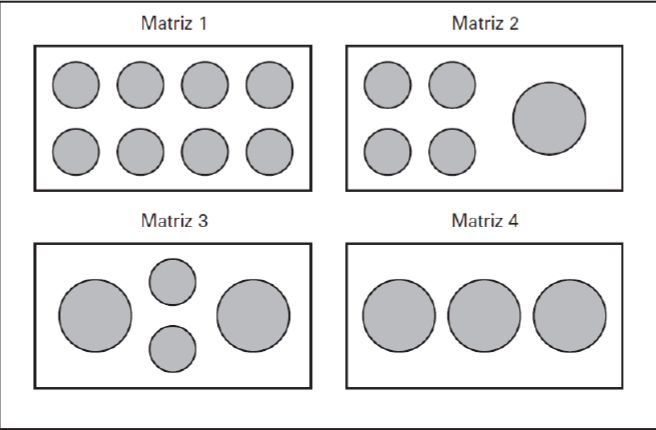

In [26]:
# Import PuLP
from pulp import *

# maximization problem
prob = LpProblem("Exercício 6", LpMinimize)

# decision variables
x1 = LpVariable("qte Mtr1", 0, None, LpInteger)
x2 = LpVariable("qte Mtr2", 0, None, LpInteger)
x3 = LpVariable("qte Mtr3", 0, None, LpInteger)
x4 = LpVariable("qte Mtr4", 0, None, LpInteger)

# objective function
prob += x1 + 2 * x2 + 3 * x3 + 2 * x4, "planeje a produção de modo a otimizar o custo com uso das chapas"

# restrictions
prob += 8 * x1 + 4 * x2 + 2 * x3 + 0 * x4 >= 500, "diária mínima de 500 panelas médias"
prob += 0 * x1 + 1 * x2 + 2 * x3 + 3 * x4 >= 350, "diária mínima de 350 panelas grandes"

prob.writeLP("exercicio_6.lp")
with open('exercicio_6.lp') as arquivo:
    for line in arquivo:
        print(line, end='')

# The problem is solved using PuLP's choice of Solver
prob.solve()

print("\nResultado\nStatus:", LpStatus[prob.status])

for v in prob.variables():
    if v.varValue>0:
        print(v.name, "=", v.varValue, "[unidades]")

obj = value(prob.objective)
print("Lucro total: R$ {}".format(round(obj,2)))



\* Exercício_6 *\
Minimize
planeje_a_produção_de_modo_a_otimizar_o_custo_com_uso_das_chapas: qte_Mtr1
 + 2 qte_Mtr2 + 3 qte_Mtr3 + 2 qte_Mtr4
Subject To
diária_mínima_de_350_panelas_grandes: qte_Mtr2 + 2 qte_Mtr3 + 3 qte_Mtr4
 >= 350
diária_mínima_de_500_panelas_médias: 8 qte_Mtr1 + 4 qte_Mtr2 + 2 qte_Mtr3
 >= 500
Bounds
 0 <= qte_Mtr1
 0 <= qte_Mtr2
 0 <= qte_Mtr3
 0 <= qte_Mtr4
Generals
qte_Mtr1
qte_Mtr2
qte_Mtr3
qte_Mtr4
End

Resultado
Status: Optimal
qte_Mtr1 = 63.0 [unidades]
qte_Mtr4 = 117.0 [unidades]
Lucro total: R$ 297.0


# Exercício 7
Uma empresa pode anunciar seus produtos na rádio local e na televisão. A verba de
propaganda é limitada a 10.000 por mês. Cada minuto de propaganda pela rádio custa
15 e cada minuto de comerciais na TV custa 300. A empresa tem um contrato com a
rádio que exige que o anúncio no mínimo duas vezes mais do que na TV. Ao mesmo
tempo, não se deseja usar mais do que 400 minutos por mês de propaganda pela rádio.
Por experiências anteriores, a empresa estima que anunciar na TV é 5 vezes mais
eficiente do que anunciar na rádio. Escreva o modelo para determinar a alocação
ótima de verba de propaganda entre rádio e TV, de maneira a maximizar a eficiência total
ponderada.

In [27]:
# Import PuLP
from pulp import *

# maximization problem
prob = LpProblem("Exercício 7", LpMaximize)

# decision variables
x1 = LpVariable("qte minutos radio", 0, None, LpInteger)
x2 = LpVariable("qte minutos tv", 0, None, LpInteger)

# objective function
prob += 1 * x1 + 5 * x2, "maximizar a eficiência total ponderada."

# restrictions
prob += 15 * x1 + 300 * x2 <=10000,"A verba de propaganda é limitada a 10.000 por mês"
prob += x1 >= 2 * x2, "rádio que exige que o anúncio no mínimo duas vezes mais do que na TV"
prob += x1 <=400, "deseja usar mais do que 400 minutos por mês de propaganda pela rádio"

prob.writeLP("exercicio_7.lp")
with open('exercicio_7.lp') as arquivo:
    for line in arquivo:
        print(line, end='')

# The problem is solved using PuLP's choice of Solver
prob.solve()

print("\nResultado\nStatus:", LpStatus[prob.status])

for v in prob.variables():
    if v.varValue>0:
        print(v.name, "=", v.varValue, "[minutos]")

obj = value(prob.objective)
print("Fo: {}".format(round(obj,2)))



\* Exercício_7 *\
Maximize
maximizar_a_eficiência_total_ponderada.: qte_minutos_radio + 5 qte_minutos_tv
Subject To
A_verba_de_propaganda_é_limitada_a_10.000_por_mês: 15 qte_minutos_radio
 + 300 qte_minutos_tv <= 10000
deseja_usar_mais_do_que_400_minutos_por_mês_de_propaganda_pela_rádio:
 qte_minutos_radio <= 400
rádio_que_exige_que_o_anúncio_no_mínimo_duas_vezes_mais_do_que_na_TV:
 qte_minutos_radio - 2 qte_minutos_tv >= 0
Bounds
 0 <= qte_minutos_radio
 0 <= qte_minutos_tv
Generals
qte_minutos_radio
qte_minutos_tv
End

Resultado
Status: Optimal
qte_minutos_radio = 400.0 [minutos]
qte_minutos_tv = 13.0 [minutos]
Fo: 465.0


# Exercício 8

Peças P1 e P2 são fabricadas em linha de produção nas máquinas M1, M2 e M3. Cada
P1 gera 20 de lucro e gasta: 1h de M1, 2h de M2 e 1h de M3. Cada P2 gera 25 de lucro e
gasta: 2h de M1, 1h de M2 e não utiliza a M3. Considere as seguintes disponibilidades para cada
máquina, respectivamente: 60h, 60h e 25h. Qual a produção maximiza o lucro?

In [28]:
# Import PuLP
from pulp import *

# maximization problem
prob = LpProblem("Exercício 8", LpMaximize)

# decision variables
x1 = LpVariable("qte P1", 0, None, LpInteger)
x2 = LpVariable("qte P2", 0, None, LpInteger)

# objective function
prob += 20 * x1 + 25 * x2, "Qual a produção maximiza o lucro"

# restrictions
prob += 1 * x1 + 2 * x2 <= 60, "Restrição da M1"
prob += 2 * x1 + 1 * x2 <= 60, "Restrição da M2"
prob += 1 * x1 + 0 * x2 <= 25, "Restrição da M3"

prob.writeLP("exercicio_8.lp")
with open('exercicio_8.lp') as arquivo:
    for line in arquivo:
        print(line, end='')

# The problem is solved using PuLP's choice of Solver
prob.solve()

print("\nResultado\nStatus:", LpStatus[prob.status])

for v in prob.variables():
    if v.varValue>0:
        print(v.name, "=", v.varValue, "[unidades]")

obj = value(prob.objective)
print("Lucro total: ${}".format(round(obj,2)))

\* Exercício_8 *\
Maximize
Qual_a_produção_maximiza_o_lucro: 20 qte_P1 + 25 qte_P2
Subject To
Restrição_da_M1: qte_P1 + 2 qte_P2 <= 60
Restrição_da_M2: 2 qte_P1 + qte_P2 <= 60
Restrição_da_M3: qte_P1 <= 25
Bounds
 0 <= qte_P1
 0 <= qte_P2
Generals
qte_P1
qte_P2
End

Resultado
Status: Optimal
qte_P1 = 20.0 [unidades]
qte_P2 = 20.0 [unidades]
Lucro total: $900.0


# Exercício 9
Uma refinaria recebe barris de dois tipos de petróleo, A e B, e transformar estes barris
e, 3 diferentes produtos: P1, P2 e P3. Os petróleos diferem na composição química. Um
barril do tipo A resulta em 0.3 barril de P1, 0.4 barril de P2 e 0.2 barril de P3. Um barril
do tipo B resulta em 0.4 barril de P1, 0.2 barril de P2 e 0.3 barril de P3. O restante de
cada barril (A ou B) é perdido no processo de refinamento. A refinaria pode comprar
9000 barris por dia a 20 cada, do tipo A; e 6000 barris por dia a 15 cada, do tipo B. A
refinaria possui contrato com um distribuidor e precisa garantir a produção de 2000
barris de P1, 1500 barris de P2 e 500 barris de P3. Modele o problema de minimização
do custo.

In [29]:
# Import PuLP
from pulp import *

# maximization problem
prob = LpProblem("Exercício 9", LpMinimize)

# decision variables
x1 = LpVariable("qte A", 0, None, LpInteger)
x2 = LpVariable("qte B", 0, None, LpInteger)

# objective function
prob += 20 * x1 + 15 * x2, "Modele o problema de minimização do custo"

# restrictions
prob += 0.3 * x1 + 0.4 * x2 >= 2000, "garantir a produção de 2000 barris de P1"
prob += 0.4 * x1 + 0.2 * x2 >= 1500, "garantir a produção de 1500 barris de P2"
prob += 0.2 * x1 + 0.3 * x2 >= 500, "garantir a produção de 500 barris de P3"
prob += x1 <= 9000, "A refinaria pode comprar 9000 barris por dia"
prob += x2 <= 6000, "A refinaria pode comprar 6000 barris por dia" 

prob.writeLP("exercicio_9.lp")
with open('exercicio_9.lp') as arquivo:
    for line in arquivo:
        print(line, end='')

# The problem is solved using PuLP's choice of Solver
prob.solve()

print("\nResultado\nStatus:", LpStatus[prob.status])

for v in prob.variables():
    if v.varValue>0:
        print(v.name, "=", v.varValue, "[barris]")

obj = value(prob.objective)
print("Custo total: ${}".format(round(obj,2)))


\* Exercício_9 *\
Minimize
Modele_o_problema_de_minimização_do_custo: 20 qte_A + 15 qte_B
Subject To
A_refinaria_pode_comprar_6000_barris_por_dia: qte_B <= 6000
A_refinaria_pode_comprar_9000_barris_por_dia: qte_A <= 9000
garantir_a_produção_de_1500_barris_de_P2: 0.4 qte_A + 0.2 qte_B >= 1500
garantir_a_produção_de_2000_barris_de_P1: 0.3 qte_A + 0.4 qte_B >= 2000
garantir_a_produção_de_500_barris_de_P3: 0.2 qte_A + 0.3 qte_B >= 500
Bounds
 0 <= qte_A
 0 <= qte_B
Generals
qte_A
qte_B
End

Resultado
Status: Optimal
qte_A = 2000.0 [barris]
qte_B = 3500.0 [barris]
Custo total: $92500.0


# Exercíco 10

Uma fábrica produz 3 tipos de peças (P1, P2 e P3) fabricadas em linha de produção
nas máquinas (M1 e M2). Cada peça P1 gasta: 6h de M1 e 1h de M2. Cada peça P2
gasta: 4h de M1 e 2h de M2; cada peça P3 gasta 3h de M1 e não passa pela M2.
Considere as seguintes disponibilidades para cada máquina: 34h (M1) e 18h (M2). Um
cliente adiantou um pedido e para atender esta demanda a produção de P3 deve ser de no
mínimo 3. Uma pesquisa de mercado indica que a produção diária de P1 não pode
ultrapassar a de P2 em mais de uma unidade. Além disso, a capacidade de produção de
P1 é de no máximo 2. Cada peça é vendida por $4, $3 e $2, respectivamente e deseja-se
maximizar o valor obtido com a venda das peças. Quais as variáveis de decisão? Qual a
função-objetivo? Quais as restrições do modelo?

In [30]:
# Import PuLP
from pulp import *

# maximization problem
prob = LpProblem("Exercício 10", LpMaximize)

# decision variables
x1 = LpVariable("qte P1", 0, None, LpInteger)
x2 = LpVariable("qte P2", 0, None, LpInteger)
x3 = LpVariable("qte P3", 0, None, LpInteger)

# objective function
prob += 1 * x1 + 3 * x2 + 2 * x3, "maximizar o valor obtido com a venda das peças"

# restrictions
prob += 6 * x1 + 4 * x2 + 3 * x3 <= 34, "disponibilidades para cada máquina 1: 34h "
prob += 1 * x1 + 2 * x2 + 0 * x3 <= 18, "disponibilidades para cada máquina 1: 18h "
prob += x3 >= 3, "produção de P3 deve ser de no mínimo 3"
prob += x1 <= 2, "capacidade de produção de P1 é de no máximo 2"
prob += x1 - x2 <= 1, "uma pesquisa de mercado indica que a produção diária de P1 não pode ultrapassar a de P2 em mais de uma unidade"

prob.writeLP("exercicio_10.lp")
with open('exercicio_10.lp') as arquivo:
    for line in arquivo:
        print(line, end='')

# The problem is solved using PuLP's choice of Solver
prob.solve()

print("\nResultado\nStatus:", LpStatus[prob.status])

for v in prob.variables():
    if v.varValue>0:
        print(v.name, "=", v.varValue, "[unidades]")

obj = value(prob.objective)
print("Lucro total: ${}".format(round(obj,2)))

\* Exercício_10 *\
Maximize
maximizar_o_valor_obtido_com_a_venda_das_peças: qte_P1 + 3 qte_P2 + 2 qte_P3
Subject To
capacidade_de_produção_de_P1_é_de_no_máximo_2: qte_P1 <= 2
disponibilidades_para_cada_máquina_1:_18h_: qte_P1 + 2 qte_P2 <= 18
disponibilidades_para_cada_máquina_1:_34h_: 6 qte_P1 + 4 qte_P2 + 3 qte_P3
 <= 34
produção_de_P3_deve_ser_de_no_mínimo_3: qte_P3 >= 3
uma_pesquisa_de_mercado_indica_que_a_produção_diária_de_P1_não_pode_ultrapassar_a_de_P2_em_mais_de_uma_unidade:
 qte_P1 - qte_P2 <= 1
Bounds
 0 <= qte_P1
 0 <= qte_P2
 0 <= qte_P3
Generals
qte_P1
qte_P2
qte_P3
End

Resultado
Status: Optimal
qte_P2 = 6.0 [unidades]
qte_P3 = 3.0 [unidades]
Lucro total: $24.0
